<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Naruto-GAN/blob/main/NARUTO_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NARUTO GAN

**This is my first GAN Practice Project.**

In this Project I try to produce Naruto Images using GANs.

The Images are available in the Google Drive.

Finally I was unable to obtain any good results.


In [95]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from matplotlib.image import imread
import cv2

In [96]:
img_folder = '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/Naruto_Uzumaki_Selected/'

## Check the range of image sizes and channels

Naruto_Uzumaki (34).png
AxesImage(54,36;334.8x217.44)
Naruto_Uzumaki (32).png
(3507, 1426, 4)


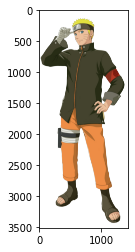

In [39]:
# To check the distribution of image sizes
dim_1 = []
dim_2 = []
channels = []
i = 0
for img_name in os.listdir(img_folder):
  if(i == 1 ):
    print(plt.imshow(imread(img_folder + img_name)))
    print(img_name)
    print(imread(img_folder + img_name).shape)
  x, y, c = imread(img_folder + img_name).shape
  dim_1.append(x)
  dim_2.append(y)
  channels.append(c)
  if(c==3):
    print(img_name)
  i+=1

In [30]:
# To check the number of images read through
len(channels)

61

In [34]:
dim_1[11], dim_2[11]


(900, 421)

In [39]:
np.mean(dim_1), np.mean(dim_2)

(1044.2622950819673, 789.016393442623)

In [40]:
np.std(dim_1), np.std(dim_2)

(607.677813190438, 457.30746165501535)

In [41]:
pd.Series(dim_1).nunique(), pd.Series(dim_2).nunique(),pd.Series(channels).nunique()

(53, 47, 2)

In [42]:
np.min(channels), np.max(channels)

(3, 4)

In [56]:
pd.Series(channels).value_counts()

4    60
3     1
dtype: int64

In [60]:
np.median(dim_1), np.median(dim_2)

(927.0, 642.0)

In [44]:
np.min(dim_1), np.max(dim_1)

(300, 3600)

In [45]:
np.min(dim_2), np.max(dim_2)

(256, 2560)

### Inference


*   This shows that there are many different image sizes and they are also distributed over a wide range.
*   This also shows that all the images in the folder have 4 channels and need to be converted to 3 channels.



## Load the images


In [231]:
IMG_HEIGHT = 256
IMG_WIDTH = 128

In [232]:
# We don't need to scale images since the pixel values are already in the range (0,1)
image_path = os.path.join(img_folder, 'Naruto_Uzumaki (10).png')
image = imread( image_path )
print( image.min(), image.max())


0.0 1.0


In [233]:
def load_images(image_folder):
   
    image_array=[]
   
    for img_name in os.listdir(img_folder):    
      if(img_name == 'Naruto_Uzumaki (34).png'):
        continue   
      image_path = os.path.join(img_folder, img_name)
      image = imread( image_path )
      image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT),interpolation = cv2.INTER_AREA)
      image = np.array(image)
      image = image.astype('float32')
      # image /= 255 
      image_array.append(image)
    return image_array
# extract the image array and class name
img_data = load_images(img_folder)

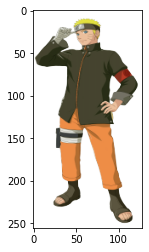

In [234]:
plt.imshow(img_data[0])

In [235]:
len(img_data)

60

In [236]:
img_data_array = np.array(img_data)

In [237]:
img_data_array.shape

(60, 256, 128, 4)

## Creating the GAN model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 4000  # The codings size should be substantially less than the 
                      # actual number of features / pixels (here 650 * 1000) 

In [46]:
# Construct Generator

generator = Sequential()
generator.add(Dense(4000, activation="relu", input_shape=[codings_size]))
generator.add(Dense(10000,activation='relu'))
# generator.add(Dense(16000,activation='relu'))
generator.add(Dense(200 * 130 * 4, activation="sigmoid")) # 28*28 = 784
# generator.add(Reshape([28,28]))

generator.add(Reshape([130, 200, 4]))

ResourceExhaustedError: ignored

In [42]:
# Construct Discriminator

discriminator = Sequential()
discriminator.add(Flatten(input_shape=[130,200,4]))
discriminator.add(Dense(2000,activation='relu'))
discriminator.add(Dense(500,activation='relu'))
discriminator.add(Dense(50,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [43]:
GAN = Sequential([generator, discriminator])

ValueError: ignored

# The Project Cannot be continued further since the images are big and it would be impossible to make a network just of Dense layers for them.

## Reshape and Rescale Images for DCGAN

Generator will use tanh activation function for the last layer, so we want to reshape X_train to be within -1 to 1 limits.

In [238]:
img_data_array = img_data_array.reshape(-1, 128, 256, 4) * 2. - 1.

In [239]:
img_data_array.min()

-1.0

In [240]:
img_data_array.max()

1.0000005

In [241]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [242]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [243]:
generator = Sequential()
generator.add(Dense(2 * 4 * 128, input_shape=[codings_size]))
generator.add(Dense(4 * 8 * 128))
generator.add(Reshape([4, 8, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1024, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(Conv2DTranspose(512, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(4, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))


In [244]:
generator.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dense_54 (Dense)             (None, 4096)              4198400   
_________________________________________________________________
reshape_20 (Reshape)         (None, 4, 8, 128)         0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 4, 8, 128)         512       
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 8, 16, 1024)       3277824   
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 16, 32, 512)       13107712  
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 32, 64, 128)     

In [247]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[128, 256, 4]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(512, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(1024, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))

discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [248]:
GAN = Sequential([generator, discriminator])

In [249]:
discriminator.trainable = False

In [250]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [251]:

GAN.layers

In [252]:
GAN.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_44 (Sequential)   (None, 128, 256, 4)       22537924  
_________________________________________________________________
sequential_47 (Sequential)   (None, 1)                 17449153  
Total params: 39,987,077
Trainable params: 22,537,540
Non-trainable params: 17,449,537
_________________________________________________________________


In [253]:
GAN.layers[0].summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dense_54 (Dense)             (None, 4096)              4198400   
_________________________________________________________________
reshape_20 (Reshape)         (None, 4, 8, 128)         0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 4, 8, 128)         512       
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 8, 16, 1024)       3277824   
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 16, 32, 512)       13107712  
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 32, 64, 128)     

In [254]:
GAN.layers[1].summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 64, 128, 64)       6464      
_________________________________________________________________
dropout_25 (Dropout)         (None, 64, 128, 64)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 64, 128)       204928    
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 64, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 32, 256)       819456    
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 32, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 16, 512)      

### Setting up Training Batches

In [255]:
import tensorflow as tf

In [256]:
batch_size = 10

https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle

The buffer_size in Dataset.shuffle() can affect the randomness of your dataset, and hence the order in which elements are produced. 

In [257]:
my_data = img_data_array

In [258]:
len(my_data)/batch_size

6.0

In [259]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [260]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [261]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [278]:
epochs = 50

**NOTE: The generator never actually sees any real images. It learns by viewing the gradients going back through the discriminator. The better the discrimnator gets through training, the more information the discriminator contains in its gradients, which means the generator can being to make progress in learning how to generate fake images, in our case, fake zeros.**

## Training Loop

In [279]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%2 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 2
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 3
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 4
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 5
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 6
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 7
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epoch 8
	Currently on batch number 2 of 6
	Currently on batch number 4 of 6
	Currently on batch number 6 of 6
Currently on Epo

In [267]:
# Most likely your generator will only learn to create one type of noisey zero
# Regardless of what noise is passed in.

https://www.quora.com/What-does-it-mean-if-all-produced-images-of-a-GAN-look-the-same

In [268]:
noise = tf.random.normal(shape=[10, codings_size])

In [269]:
noise.shape

TensorShape([10, 100])

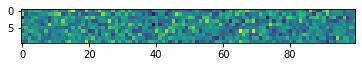

In [270]:
plt.imshow(noise)

In [271]:
images = generator(noise)

In [272]:
single_image = images[0]

In [273]:
# single_image.numpy().reshape(28,28)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


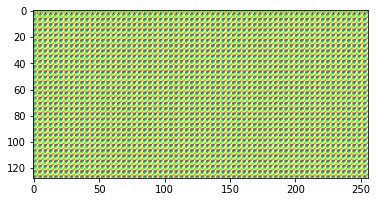

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


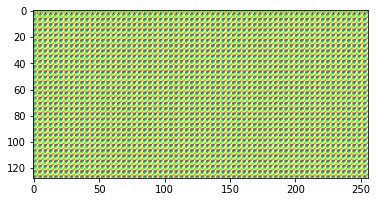

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


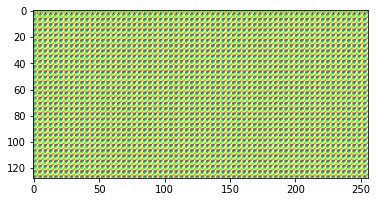

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


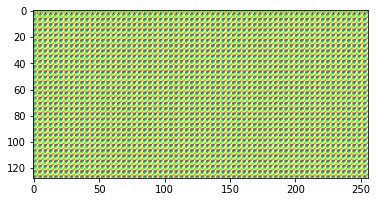

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


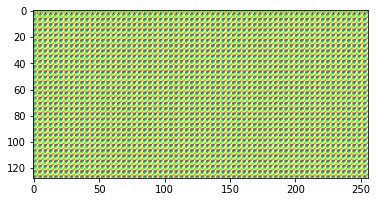

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


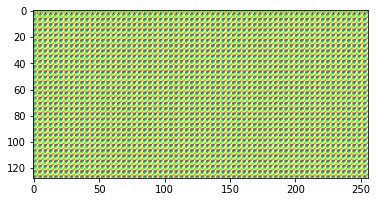

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


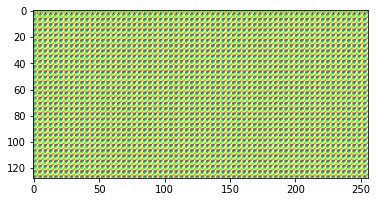

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


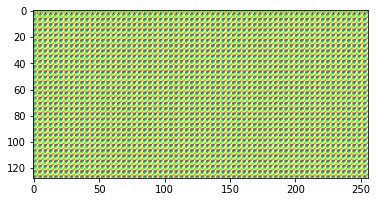

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


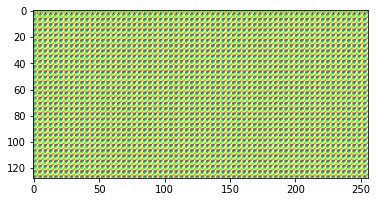

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


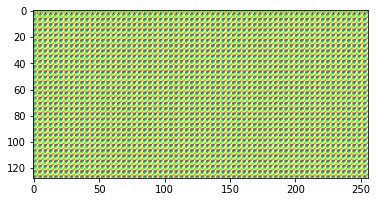

In [277]:
for image in images:
    plt.imshow(image.numpy().reshape(128,256,4))
    plt.show()

# FAILED